In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ML models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [5]:
pip install matplotlib seaborn xgboost

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 18.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 13.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 10.3 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 9.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 6.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.3 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 3.7 MB/s eta 0:00:16


In [12]:
df = pd.read_csv(r"C:\Users\Jayanth Raj G\OneDrive\Documents\student-backend\app\data\students_cleaned.csv")  # or students.csv
features = ["comprehension", "attention", "focus", "retention", "engagement_time"]
target = "assessment_score"

In [16]:
X = df[features]
y = df[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

lin_model = Pipeline(steps=[
    ('scaler', StandardScaler()),   # Handles scaling internally
    ('regressor', LinearRegression())
])

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [19]:
results = []

for name, model in models.items():
    # Wrap scaling into a pipeline only for models sensitive to feature scaling
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression", "Support Vector Regressor"]:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
    else:
        pipeline = model  # Tree-based or robust models don’t need scaling

    # Train and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_score = np.mean(cross_val_score(pipeline, X, y, cv=5))

    results.append({
        "Model": name,
        "R²": r2,
        "RMSE": rmse,
        "CV Score": cv_score
    })

In [20]:
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("📊 Model Performance Summary:")
print(results_df)

📊 Model Performance Summary:
                      Model        R²      RMSE  CV Score
0         Linear Regression  0.829028  4.872676  0.817150
1          Ridge Regression  0.829016  4.872856  0.817152
2          Lasso Regression  0.828330  4.882625  0.816375
5         Gradient Boosting  0.812728  5.099673  0.795704
4             Random Forest  0.810583  5.128795  0.787345
7                   XGBoost  0.778496  5.546208  0.749022
6  Support Vector Regressor  0.726916  6.158201  0.762861
3             Decision Tree  0.603047  7.424635  0.588758


C:\Users\Jayanth Raj G\AppData\Local\Temp\ipykernel_25084\3470544749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R²", y="Model", palette="viridis")


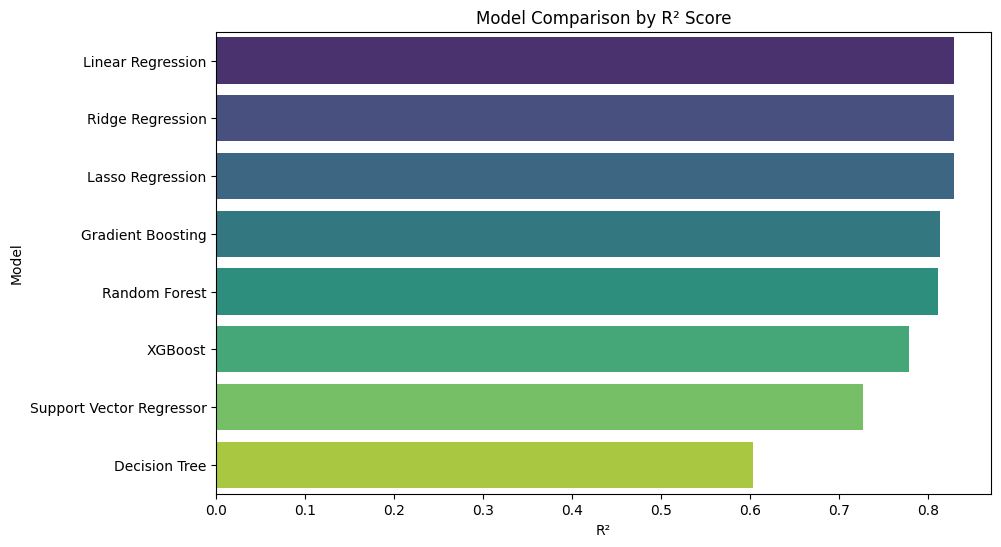

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="R²", y="Model", palette="viridis")
plt.title("Model Comparison by R² Score")
plt.show()


C:\Users\Jayanth Raj G\AppData\Local\Temp\ipykernel_25084\1559732673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", palette="magma")


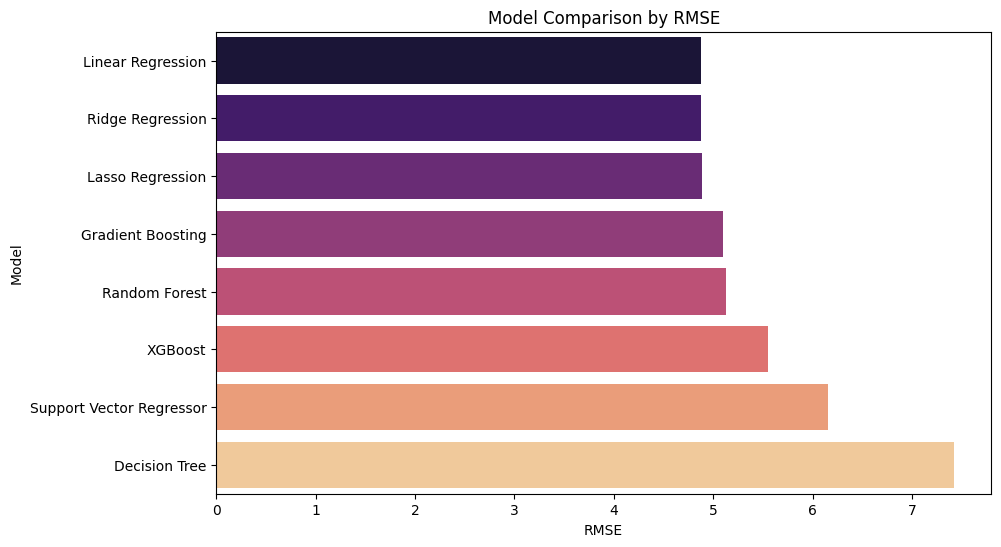

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="RMSE", y="Model", palette="magma")
plt.title("Model Comparison by RMSE")
plt.show()

In [23]:
best_model = results_df.iloc[0]
print(f"🏆 Best Model: {best_model['Model']} (R²: {best_model['R²']:.3f}, RMSE: {best_model['RMSE']:.3f})")

🏆 Best Model: Linear Regression (R²: 0.829, RMSE: 4.873)
